In [1]:
import pandas as pd
from collections import defaultdict

In [2]:
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
from tools import save, load, lprint, checkdir

from plottools import above, below, left, right, plotJLab12, custom_label, color_plot, color_plot_hull

#--matplotlib
import matplotlib
matplotlib.use('PS')
matplotlib.rc('text',usetex=True)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
import pylab as py
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
# Load the Excel file
file_path = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_values_100k_affinity_full_MC_100k_weird_0.3.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Sort by 'x' (ascending)
data_sorted = data.sort_values(by='x')

# Create rounded versions of binning columns
data_sorted['x_rounded'] = data_sorted['x'].round(1)
data_sorted['Q2_rounded'] = data_sorted['Q2'].round(1)
data_sorted['z_rounded'] = data_sorted['z'].round(1)
data_sorted['pT_rounded'] = data_sorted['pT'].round(1)

# Group by the rounded bins while keeping all original data
grouped = data_sorted.groupby(['x_rounded', 'Q2_rounded', 'z_rounded', 'pT_rounded'])

# Create a new DataFrame that preserves all original data with bin info
result = []
for (x_bin, Q2_bin, z_bin, pT_bin), group in grouped:
    # Add bin information to each row
    group = group.copy()
    group['bin_count'] = len(group)  # Add count of rows in this bin
    result.append(group)

# Combine all groups back into one DataFrame
final_df = pd.concat(result)

# Drop the temporary rounded columns if desired
# final_df = final_df.drop(columns=['x_rounded', 'Q2_rounded', 'z_rounded', 'pT_rounded'])

# Save to new Excel file
output_file = 'binned_data_with_all_columns.xlsx'
final_df.to_excel(output_file, index=False)

print(f"Binned data with all original columns saved to {output_file}")

Binned data with all original columns saved to binned_data_with_all_columns.xlsx


In [4]:
final_df

Unnamed: 0.1  Unnamed: 0       M     M_h         x         z       Q  \
84026         84026       84026  0.9383  0.1396  0.066362  0.155175  1.0098   
84565         84565       84565  0.9383  0.1396  0.090864  0.213349  1.0192   
83717         83717       83717  0.9383  0.1396  0.066326  0.213000  1.0126   
10112         10112       10112  0.9383  0.1396  0.066796  0.184521  1.0038   
29371         29371       29371  0.9383  0.1396  0.066956  0.219973  1.0116   
...             ...         ...     ...     ...       ...       ...     ...   
75652         75652       75652  0.9383  0.1396  0.713722  0.176740  3.2117   
75653         75653       75653  0.9383  0.1396  0.713722  0.264383  3.2117   
13466         13466       13466  0.9383  0.1396  0.692970  0.447712  3.2223   
86243         86243       86243  0.9383  0.1396  0.715247  0.601794  3.2493   
85361         85361       85361  0.9383  0.1396  0.751831  0.317243  3.1425   

             qT        pT         Q2  ...        yp        yh  yhtarget  \
84026  0.278284  0.042902   1.019696  ...  2.789198 -0.064100  5.687311   
84565  0.024892  0.005259   1.038769  ...  2.487369 -0.432843  5.408280   
83717  0.464894  0.098572   1.025359  ...  2.792484 -0.228810  6.014861   
10112  0.570760  0.104807   1.007615  ...  2.776810 -0.054686  5.830500   
29371  0.317333  0.069458   1.023335  ...  2.782123 -0.351231  6.025353   
...         ...       ...        ...  ...       ...       ...       ...   
75652  1.581380  0.270450  10.315017  ...  1.608029 -0.611785  4.575374   
75653  1.332209  0.340413  10.315017  ...  1.608029 -0.829063  4.979564   
13466  0.171498  0.073967  10.383218  ...  1.638372 -2.181233  5.573555   
86243  0.114863  0.066491  10.557951  ...  1.616806 -2.504287  5.832968   
85361  0.409082  0.124044   9.875306  ...  1.540308 -1.647236  4.998723   

             yi        yf  x_rounded  Q2_rounded  z_rounded  pT_rounded  \
84026  1.224547  0.063534        0.1         1.0        0.2         0.0   
84565  1.424579 -1.472443        0.1         1.0        0.2         0.0   
83717  0.829310 -0.796588        0.1         1.0        0.2         0.1   
10112  0.527321 -0.101796        0.1         1.0        0.2         0.1   
29371  1.246881 -0.671585        0.1         1.0        0.2         0.1   
...         ...       ...        ...         ...        ...         ...   
75652  1.373851 -1.971035        0.7        10.3        0.2         0.3   
75653  1.569640 -1.970975        0.7        10.3        0.3         0.3   
13466  1.681348 -2.169573        0.7        10.4        0.4         0.1   
86243  1.212358 -1.710865        0.7        10.6        0.6         0.1   
85361  1.676150 -2.508048        0.8         9.9        0.3         0.1   

       bin_count  
84026          2  
84565          2  
83717         12  
10112         12  
29371         12  
...          ...  
75652          1  
75653          1  
13466          1  
86243          1  
85361          1  

[100001 rows x 42 columns]

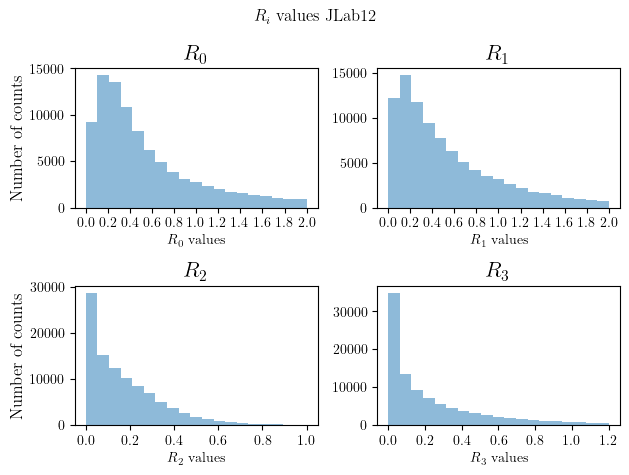

In [5]:
fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values JLab12')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(final_df['R0'], alpha = 0.5, bins = edges1, linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].set_xticks(np.arange(0, 2.2, step=0.2))

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(final_df['R1'], alpha = 0.5, bins = edges3, linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].set_xticks(np.arange(0, 2.2, step=0.2))

edges2 = np.linspace(0, 1, 20)

axs[1, 0].hist(final_df['R2'], alpha = 0.5, bins = edges2, linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].set_xticks(np.arange(0, 1.1, step=0.2))

edges4 = np.linspace(0, 1.2, 20)

axs[1, 1].hist(final_df['R3'], alpha = 0.5, bins = edges4, linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].set_xticks(np.arange(0, 1.3, step=0.2))

fig.tight_layout()

In [6]:
final_df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'M', 'M_h', 'x', 'z', 'Q', 'qT', 'pT',
       'Q2', 'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff',
       'tmdnpaff', 'collinearaff', 'collinearloworderaff',
       'collinearhighorderaff', 'matchaff', 'softaff', 'targetaff',
       'unclassifiedaff', 'R0', 'R1', 'R1p', 'R2', 'R3', 'R4', 'R5', 'xN',
       'zN', 'yp', 'yh', 'yhtarget', 'yi', 'yf', 'x_rounded', 'Q2_rounded',
       'z_rounded', 'pT_rounded', 'bin_count'],
      dtype='object')

In [7]:
data_sorted = pd.DataFrame({'x': final_df['x_rounded'], 'Q2': final_df['Q2_rounded'], 'z': final_df['z_rounded'],
                          'pT': final_df['pT_rounded'], 'M': final_df['M'], 'target': final_df['target'],
                           'hadron': final_df['hadron'], 'partonicaff': final_df['partonicaff'], 
                           'currentaff': final_df['currentaff'], 'tmdaff': final_df['tmdaff'], 
                           'tmdnpaff': final_df['tmdnpaff'], 'collinearaff': final_df['collinearaff'], 
                           'collinearloworderaff': final_df['collinearloworderaff'],
                           'collinearhighorderaff': final_df['collinearhighorderaff'], 
                           'matchaff': final_df['matchaff'], 'softaff': final_df['softaff'], 
                           'targetaff': final_df['targetaff'],'unclassifiedaff': final_df['unclassifiedaff']})

In [8]:
data_sorted.to_excel('Affinity_data.xlsx')
data_sorted

x    Q2    z   pT       M  target hadron  partonicaff  currentaff  \
84026  0.1   1.0  0.2  0.0  0.9383  proton    pi+            0           0   
84565  0.1   1.0  0.2  0.0  0.9383  proton    pi+            1           0   
83717  0.1   1.0  0.2  0.1  0.9383  proton    pi+            0           0   
10112  0.1   1.0  0.2  0.1  0.9383  proton    pi+            0           0   
29371  0.1   1.0  0.2  0.1  0.9383  proton    pi+            0           0   
...    ...   ...  ...  ...     ...     ...    ...          ...         ...   
75652  0.7  10.3  0.2  0.3  0.9383  proton    pi+            1           1   
75653  0.7  10.3  0.3  0.3  0.9383  proton    pi+            1           1   
13466  0.7  10.4  0.4  0.1  0.9383  proton    pi+            1           1   
86243  0.7  10.6  0.6  0.1  0.9383  proton    pi+            1           1   
85361  0.8   9.9  0.3  0.1  0.9383  proton    pi+            1           1   

       tmdaff  tmdnpaff  collinearaff  collinearloworderaff  \
84026       0         0             0                     0   
84565       0         0             0                     0   
83717       0         0             0                     0   
10112       0         0             0                     0   
29371       0         0             0                     0   
...       ...       ...           ...                   ...   
75652       1         0             0                     0   
75653       1         0             0                     0   
13466       1         0             0                     0   
86243       1         0             0                     0   
85361       1         0             0                     0   

       collinearhighorderaff  matchaff  softaff  targetaff  unclassifiedaff  
84026                      0         0        0          0                1  
84565                      0         0        1          0                0  
83717                      0         0        0          0                1  
10112                      0         0        0          0                1  
29371                      0         0        0          0                1  
...                      ...       ...      ...        ...              ...  
75652                      0         0        0          0                0  
75653                      0         0        0          0                0  
13466                      0         0        0          0                0  
86243                      0         0        0          0                0  
85361                      0         0        0          0                0  

[100001 rows x 18 columns]

In [9]:
for i in range(len(data_sorted)):
    value = data_sorted.loc[i, 'Q2']
    lower_bound = int(value)
    if lower_bound <= value < lower_bound + 1:
        data_sorted.loc[i, 'Q2'] = lower_bound + 0.5  # No warning!

In [10]:
data_sorted

x    Q2    z   pT       M  target hadron  partonicaff  currentaff  \
84026  0.1   1.5  0.2  0.0  0.9383  proton    pi+            0           0   
84565  0.1   1.5  0.2  0.0  0.9383  proton    pi+            1           0   
83717  0.1   1.5  0.2  0.1  0.9383  proton    pi+            0           0   
10112  0.1   1.5  0.2  0.1  0.9383  proton    pi+            0           0   
29371  0.1   1.5  0.2  0.1  0.9383  proton    pi+            0           0   
...    ...   ...  ...  ...     ...     ...    ...          ...         ...   
75652  0.7  10.5  0.2  0.3  0.9383  proton    pi+            1           1   
75653  0.7  10.5  0.3  0.3  0.9383  proton    pi+            1           1   
13466  0.7  10.5  0.4  0.1  0.9383  proton    pi+            1           1   
86243  0.7  10.5  0.6  0.1  0.9383  proton    pi+            1           1   
85361  0.8   9.5  0.3  0.1  0.9383  proton    pi+            1           1   

       tmdaff  tmdnpaff  collinearaff  collinearloworderaff  \
84026       0         0             0                     0   
84565       0         0             0                     0   
83717       0         0             0                     0   
10112       0         0             0                     0   
29371       0         0             0                     0   
...       ...       ...           ...                   ...   
75652       1         0             0                     0   
75653       1         0             0                     0   
13466       1         0             0                     0   
86243       1         0             0                     0   
85361       1         0             0                     0   

       collinearhighorderaff  matchaff  softaff  targetaff  unclassifiedaff  
84026                      0         0        0          0                1  
84565                      0         0        1          0                0  
83717                      0         0        0          0                1  
10112                      0         0        0          0                1  
29371                      0         0        0          0                1  
...                      ...       ...      ...        ...              ...  
75652                      0         0        0          0                0  
75653                      0         0        0          0                0  
13466                      0         0        0          0                0  
86243                      0         0        0          0                0  
85361                      0         0        0          0                0  

[100001 rows x 18 columns]

In [30]:
# # Load the data
# # file_path = 'Affinity_data.xlsx'
# # data = pd.read_excel(file_path)
# data = data_sorted

# # Columns to group by (x, Q2, z, pT)
# group_cols = ['x', 'Q2', 'z', 'pT']

# # Columns to sum (all except M, target, hadron, and the group columns)
# columns_to_sum = [col for col in data.columns if col not in group_cols + ['M', 'target', 'hadron']]

# # Group by the specified columns and sum the values
# summed_data = data.groupby(group_cols)[columns_to_sum].sum().reset_index()

# # Add back the non-summed columns (M, target, hadron) by taking the first occurrence
# non_summed_data = data.drop_duplicates(subset=group_cols, keep='first')[group_cols + ['M', 'target', 'hadron']]
# result = pd.merge(summed_data, non_summed_data, on=group_cols)

# # Reorder columns to match the original structure
# original_columns_order = data.columns
# result = result[original_columns_order]

# # Save the result to a new file
# output_file_path = 'Affinity_data_unique_bins.xlsx'
# result.to_excel(output_file_path, index=False)

In [11]:
# Make a copy of the original data
data = data_sorted.copy()

# Columns to group by (x, Q2, z, pT)
group_cols = ['x', 'Q2', 'z', 'pT']

# Columns to sum (all except M, target, hadron, and the group columns)
columns_to_sum = [col for col in data.columns if col not in group_cols + ['M', 'target', 'hadron']]

# First, calculate bin counts
bin_counts = data.groupby(group_cols).size().reset_index(name='bin_count')

# Group by the specified columns and sum the values
summed_data = data.groupby(group_cols)[columns_to_sum].sum().reset_index()

# Merge with bin counts
summed_data = pd.merge(summed_data, bin_counts, on=group_cols)

# Divide the summed values by the bin_count to get the average
for col in columns_to_sum:
    summed_data[col] = summed_data[col] / summed_data['bin_count']

# # Drop the bin_count column as it's no longer needed
# summed_data = summed_data.drop(columns=['bin_count'])

# Add back the non-summed columns (M, target, hadron) by taking the first occurrence
non_summed_data = data.drop_duplicates(subset=group_cols, keep='first')[group_cols + ['M', 'target', 'hadron']]
result = pd.merge(summed_data, non_summed_data, on=group_cols)

# # Reorder columns to match the original structure
# original_columns_order = data.columns
# result = result[original_columns_order]

# Reorder columns to match the original structure plus the new count column
original_columns_order = data.columns.tolist()
result = result[original_columns_order + ['bin_count']]

# Save the result to a new file
output_file_path = 'Affinity_data_unique_bins_averaged.xlsx'
result.to_excel(output_file_path, index=False)

In [12]:
result

x    Q2    z   pT       M  target hadron  partonicaff  currentaff  \
0     0.1   1.5  0.1  0.1  0.9383  proton    pi+          0.0         0.0   
1     0.1   1.5  0.1  0.2  0.9383  proton    pi+          0.0         0.0   
2     0.1   1.5  0.1  0.3  0.9383  proton    pi+          0.0         0.0   
3     0.1   1.5  0.1  0.4  0.9383  proton    pi+          0.0         0.0   
4     0.1   1.5  0.1  0.5  0.9383  proton    pi+          0.0         0.0   
...   ...   ...  ...  ...     ...     ...    ...          ...         ...   
1515  0.7  10.5  0.3  0.4  0.9383  proton    pi+          1.0         1.0   
1516  0.7  10.5  0.4  0.1  0.9383  proton    pi+          1.0         1.0   
1517  0.7  10.5  0.4  0.4  0.9383  proton    pi+          1.0         1.0   
1518  0.7  10.5  0.6  0.1  0.9383  proton    pi+          1.0         1.0   
1519  0.8   9.5  0.3  0.1  0.9383  proton    pi+          1.0         1.0   

      tmdaff  tmdnpaff  collinearaff  collinearloworderaff  \
0        0.0       0.0           0.0                   0.0   
1        0.0       0.0           0.0                   0.0   
2        0.0       0.0           0.0                   0.0   
3        0.0       0.0           0.0                   0.0   
4        0.0       0.0           0.0                   0.0   
...      ...       ...           ...                   ...   
1515     1.0       0.0           0.0                   0.0   
1516     1.0       0.0           0.0                   0.0   
1517     1.0       0.0           0.0                   0.0   
1518     1.0       0.0           0.0                   0.0   
1519     1.0       0.0           0.0                   0.0   

      collinearhighorderaff  matchaff  softaff  targetaff  unclassifiedaff  \
0                       0.0       0.0      0.0        0.0              1.0   
1                       0.0       0.0      0.0        0.0              1.0   
2                       0.0       0.0      0.0        0.0              1.0   
3                       0.0       0.0      0.0        0.0              1.0   
4                       0.0       0.0      0.0        0.0              1.0   
...                     ...       ...      ...        ...              ...   
1515                    0.0       0.0      0.0        0.0              0.0   
1516                    0.0       0.0      0.0        0.0              0.0   
1517                    0.0       0.0      0.0        0.0              0.0   
1518                    0.0       0.0      0.0        0.0              0.0   
1519                    0.0       0.0      0.0        0.0              0.0   

      bin_count  
0             2  
1             1  
2             1  
3             1  
4             2  
...         ...  
1515          1  
1516          2  
1517          1  
1518          1  
1519          1  

[1520 rows x 19 columns]

In [13]:
print('Unique values of x:', result.x.unique())
print('\nUnique values of Q2:', result.Q2.unique())

Unique values of x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]

Unique values of Q2: [ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


In [14]:
data=result

In [17]:
def plotJLab12(data, hadron = 'pi+', affinity = 'tmdaff', plotx = 'qT', ploty = 'z', cmap_name = 'seismic_r', yscale = 'linear'):

    if 'Q' not in data.keys():
        data['Q']=data['Q2']**0.5
    if 'had' not in data.keys() and 'hadron' in data.keys(): 
        data['had'] = data['hadron']    
    if 'qT' not in data.keys():
        data['qT'] = data['pT']/data['z']
    if 'qToverQ' not in data.keys():
        data['qToverQ'] = data['qT']/data['Q']        
        
    Q2b=data.Q2.unique()    
    xb=data.x.unique()
    zbins=data.z.unique()    
    
    bins={}
    
    for ix in range(len(xb)):
        for iQ2 in range(len(Q2b)):
            #print "iQ2=", len(Q2b)-iQ2-1, " ix= ", ix, ": ","Q2=="+str(Q2b[iQ2])+" and x=="+str(xb[ix])
            msg="Q2=="+str(Q2b[iQ2])+" and x=="+str(xb[ix])
            if data.query(msg).index.size != 0:
                bins[(len(Q2b)-iQ2-1,ix)]=msg

    
    
    nrows,ncols=len(Q2b),len(xb)
    fig = py.figure(figsize=(ncols*3.2,nrows*3.2))
    gs = gridspec.GridSpec(nrows,ncols)
    gs.update(wspace=0.,hspace=0,left=0.12, right=0.86,bottom=0.13,top=0.86)
    AX={}
    cmap = plt.get_cmap(cmap_name) # choose cmap
 
    # add a smaller subplot to explain axes
    leftb, bottomb, widthb, heightb = [0.2, 0.7, 0.25, 0.2]
    ax2 = fig.add_axes([leftb, bottomb, widthb, heightb])
    
    for k in sorted(bins):
        ir,ic=k
#         print(k)
        ax = py.subplot(gs[ir,ic])
        ax.set_xlim(0,8)
        ax.set_ylim(0,1)
        #ax.set_xlim(0,data.qT.max())
        if ploty == 'z': 
            ax.set_xlim(0,1) # z is in [0,1]
            ax2.set_xlim(0,1)
            ax2.set_xlabel(r'$z_h$', fontsize=70) 
        if plotx == 'pT': 
            ax.set_ylim(0,1.5) # pT is in [0,2]
            ax2.set_ylim(0,1.5)
            ax2.set_ylabel(r'\boldmath{$P_{hT}\;\rm (GeV)$}', fontsize=70) 
        if plotx == 'qT': 
            ax.set_ylim(0,15) #(0,data.qT.max())
            ax2.set_ylim(0,15)
            ax2.set_ylabel(r'$q_T$', fontsize=70)
        if plotx == 'qToverQ' and affinity.startswith('tmd'): 
            ax.set_ylim(0,1) #(0,data.qT.max())
            ax2.set_ylim(0,1)
            ax2.set_ylabel(r'\boldmath{$q_T/Q$}', fontsize=70)
        if plotx == 'qToverQ' and affinity.startswith('col'): 
            ax.set_ylim(0,5) #(0,data.qT.max())
            ax2.set_ylim(0,5)
            ax2.set_ylabel(r'\boldmath{$q_T/Q$}', fontsize=70)


            
                     
            
        ax.set_yscale(yscale) # log or linear
        ax2.set_yscale(yscale)
        
        # Plot 5 ticks on x and y axis and drop the first and the last ones to avoid overlay:
        xticks = np.round(np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5),1)[1:4]
        yticks = np.round(np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5),1)[1:4]
        
        ax2.set_xticks(xticks)
        ax2.set_yticks(yticks)
        ax2.set_xticklabels(xticks, fontsize=40)  
        ax2.set_yticklabels(yticks, fontsize=40)
        
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        if  below(bins,ir,ic)==False : # no bins below
            ax.set_xticklabels(xticks)
        if  left(bins,ir,ic)==False : # no bins to the left
            ax.set_yticklabels(yticks)   
        
        
        d=data.query('%s and  had=="%s"'%(bins[k],hadron))
        
        for i in range(len(zbins)):
            #somehow simple query does not work:
            #dd=d.query('z==%f'%zbins[i])
            msg='z > '+str(zbins[i]-zbins[i]/100)+' and z < '+ str(zbins[i]+zbins[i]/100)
            dd=d.query(msg)
            if dd.index.size==0: continue
            #plot = ax.scatter(dd[plotx],dd[ploty], s=500*dd[affinity], c=dd[affinity], 
            #                      cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
            #ax.plot(dd[plotx],dd[ploty],'k-', alpha=0.25,label='') 
            plot = ax.scatter(dd[ploty],dd[plotx], s=1500*dd[affinity]+10, c=dd[affinity], 
                                  cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
            ax.plot(dd[ploty],dd[plotx],'k-', alpha=0.25,label='')
            #ax.text(0, 2, k, fontsize=18) # show what bin is shown
            
            #Here we change the scaled bin number to any we want by changing "k==..."
            if k == (4,3):
                ax2.scatter(dd[ploty],dd[plotx], s=3500*dd[affinity]+10, c=dd[affinity], 
                                  cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
                ax2.plot(dd[ploty],dd[plotx],'k-', alpha=0.25,label='')
                ax.annotate('',xy=(0.,1),xycoords='axes fraction',xytext=(-0.75,1.5), 
                            arrowprops=dict(arrowstyle="->, head_width=1, head_length=2", color='k',lw=4))
                  
                
                
        ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
        
        
        # Add embelishment here:
        if  below(bins,ir,ic)==False and left(bins,ir,ic)==False:    

            ax.annotate('', xy=(-0.35, 8.2), 
                        xycoords='axes fraction', 
                        xytext=(-0.35, -0.1),
                        arrowprops=dict(arrowstyle="-|>, head_width=1, head_length=2", 
                        color='k',lw=3))

            ax.annotate('', xy=(5.2,-0.3), 
                        xycoords='axes fraction', 
                        xytext=(-0.1, -0.3),
                        arrowprops=dict(arrowstyle="-|>, head_width=1, head_length=2", 
                        color='k',lw=3))        

            ax.annotate(r'\boldmath{$Q^2~({\rm GeV}^2)$}', 
                        xy=(-1.5,4),
                        xycoords='axes fraction',
                        size=80,
                        rotation=90)

            ax.annotate(r'\boldmath{$x_{\rm Bj}$}', 
                        xy=(2.3,-1.2),
                        xycoords='axes fraction',
                        size=80)
                    
            for i in range(len(data.x.unique())):
                if xb[i]<2e-3: msg=r'$%0.5f$'%xb[i]
                elif xb[i]<2e-2: msg=r'$%0.3f$'%xb[i]  
                else:msg=r'$%0.2f$'%xb[i]
                ax.text(0.5+i,-0.65,msg,transform=ax.transAxes,size=45,ha="center")
                ax.annotate('',xy=(i,-0.35),xycoords='axes fraction',xytext=(i+1, -0.35), 
                            arrowprops=dict(arrowstyle="<->", color='k'))
    
            for i in range(len(data.Q2.unique())):
                ax.text(-0.65,0.5+i,r'$%0.1f$'%Q2b[i],
                      transform=ax.transAxes,size=45,rotation=90,va="center")
                ax.annotate('',xy=(-0.4,i),xycoords='axes fraction',xytext=(-0.4,i+1), 
                            arrowprops=dict(arrowstyle="<->", color='k'))
                
        #if plotx == 'qT': ax.plot([d.Q.values[0],8],[2e-4,2e-4],c='y',lw=10,alpha=0.5) # plot qt>Q region
            
        
        if below(bins,ir,ic)==False and left(bins,ir,ic)==False:    # otherwise just plot qt>Q
            label1 = ' '
            if affinity.startswith('tmd'): 
                label1 = 'TMD'
            elif affinity.startswith('col'): 
                label1 = 'Collinear' 
            elif affinity.startswith('target'): 
                label1 = 'Target' 
            elif affinity.startswith('soft'): 
                label1 = 'Central'
            elif affinity.startswith('highorder'): 
                label1 = 'High order'
            elif affinity.startswith('match'): 
                label1 = 'Matching'
            elif affinity.startswith('unclassified'): 
                label1 = 'Unclassified'



            #msg=r'${\rm %s~region~EIC~%s}$'%(label1,hadron)
#             msg=r'\boldmath{${\rm %s~region~JLab12~Gaus}$}'%(label1)
            msg=r'\boldmath{${\rm %s~region~JLab12~(pure~MC)}$}'%(label1)
            
            ax.text(0,11,msg,transform=ax.transAxes,size=60)
            #msg =r'\boldmath{${\sqrt{s}=4.6 \; \; \rm GeV}$}'
            #ax.text(0,8.2,msg,transform=ax.transAxes,size=80)
            #msg =r'${\rm %s~vs.~%s}$'%(ploty,plotx)
            #ax.text(0,5.2,msg,transform=ax.transAxes,size=80)
            
            # plot the legend of axes
            ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
                   ,markerscale=2,handletextpad=0.1)
    

    
    cbar_ax = fig.add_axes([0.92, 0.2, 0.01, 0.5])
    cbar = fig.colorbar(plot,cax=cbar_ax)
    cbar.ax.tick_params(labelsize=40)
    outname = 'JLab12_%s_vs_%s_%s_%s'%(ploty,plotx,hadron,affinity)
    py.savefig('./Figs/%s.pdf'%outname,
            bbox_inches ="tight")
    py.savefig('./Figs/%s.jpeg'%outname,
            bbox_inches ="tight")

/var/folders/yt/tjm27b5n1dzb1mgwxkts1hq80000gn/T/ipykernel_38519/2210421730.py:195: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\


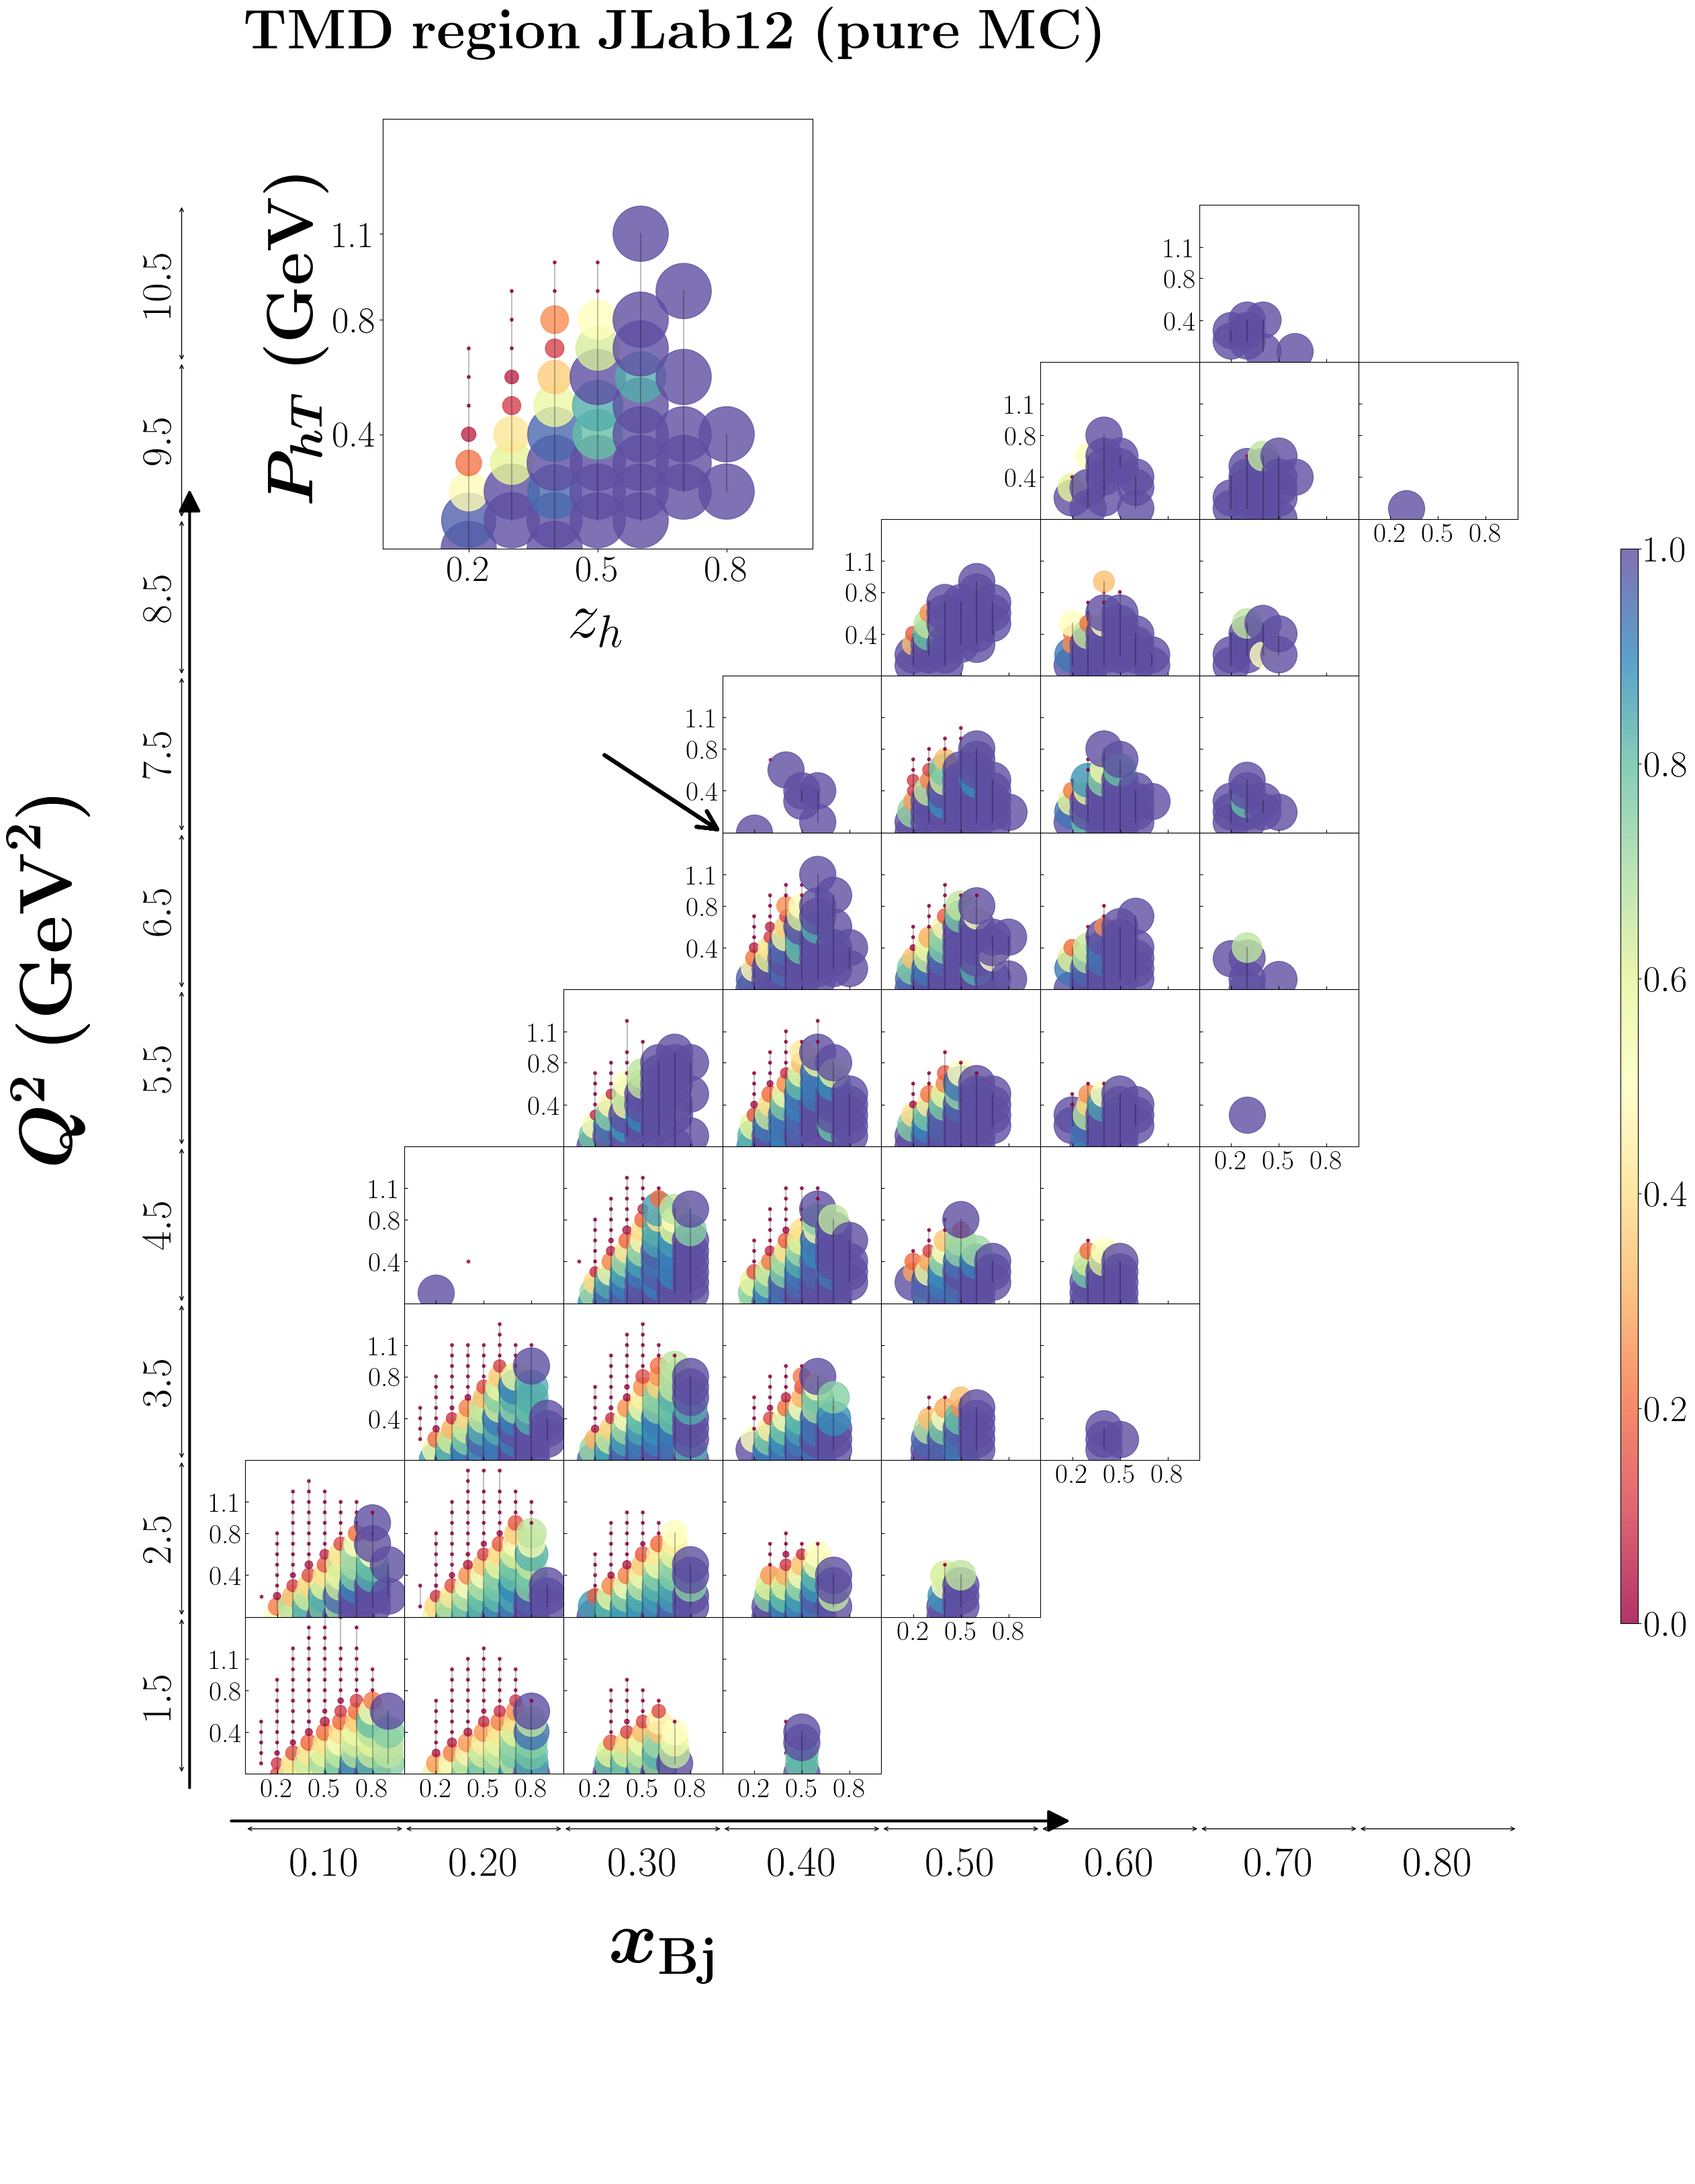

In [18]:
plotJLab12(data ,hadron = 'pi+', affinity = 'tmdaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

/var/folders/yt/tjm27b5n1dzb1mgwxkts1hq80000gn/T/ipykernel_10745/2443175420.py:195: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\


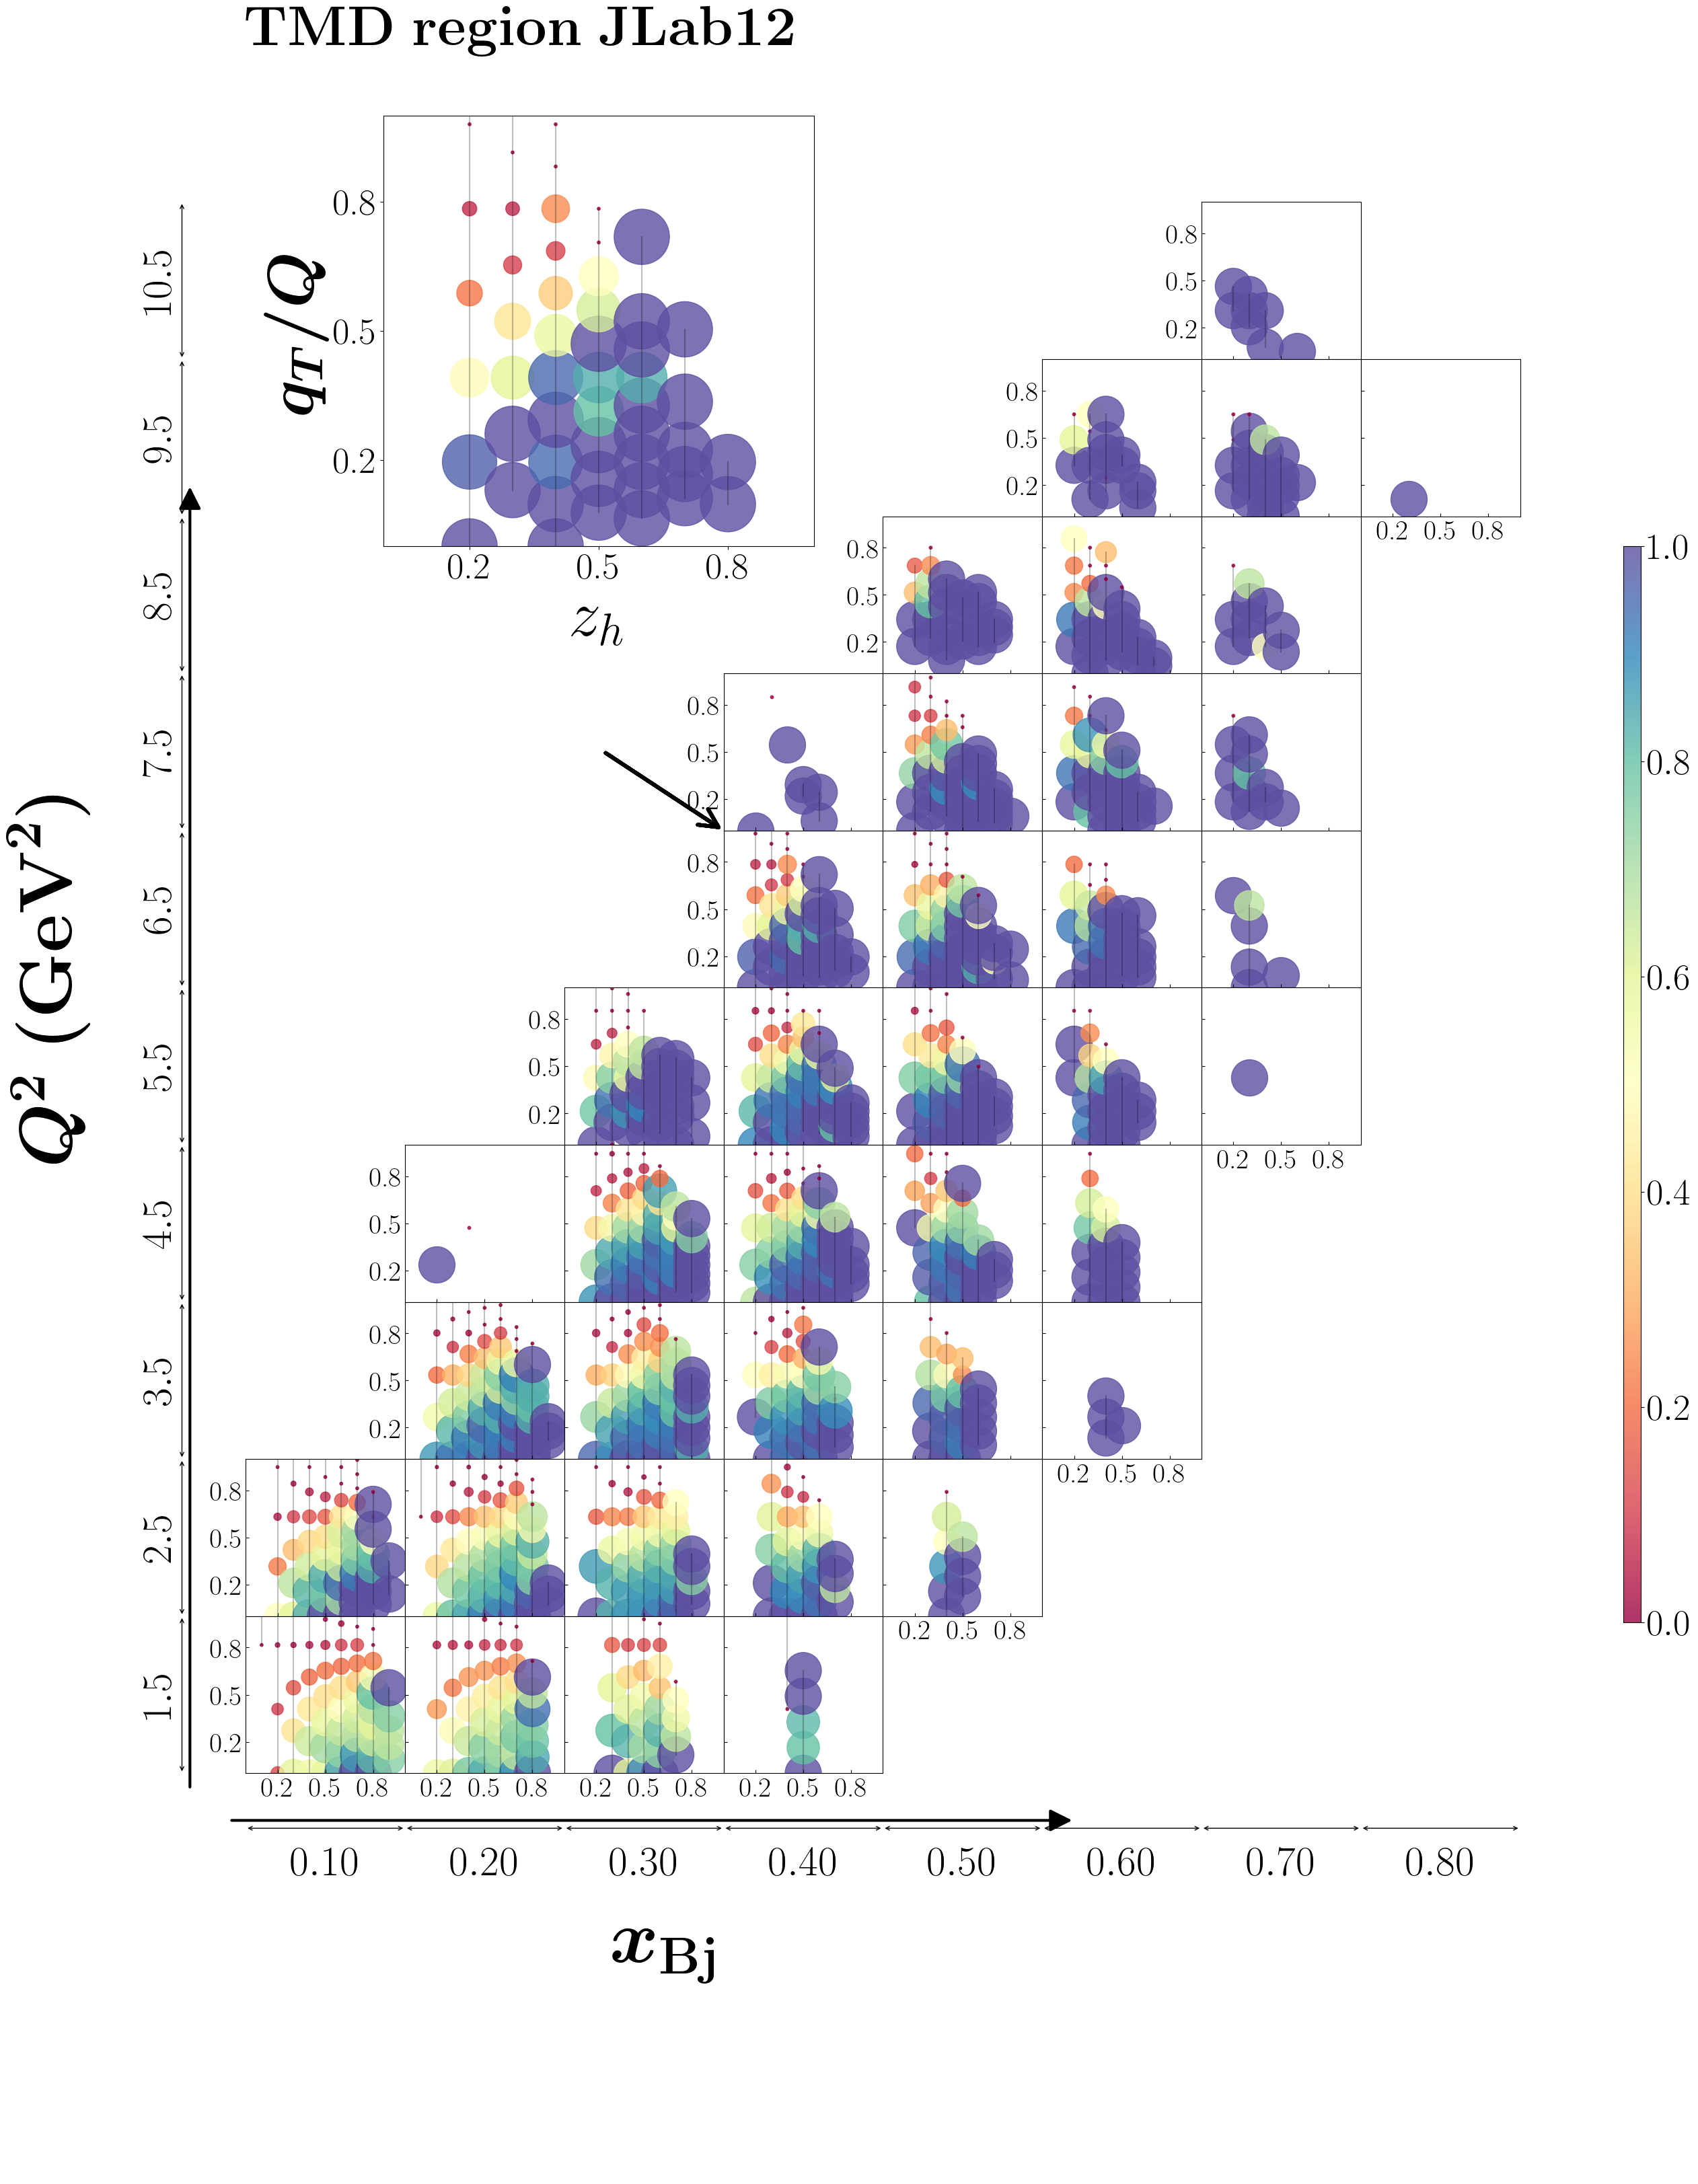

In [149]:
plotJLab12(data ,hadron = 'pi+', affinity = 'tmdaff', plotx = 'qToverQ', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

In [150]:
data['bin_count'].max()

1675

In [154]:
def plotJLab12_bin_count(data, hadron = 'pi+', affinity = 'tmdaff', plotx = 'qT', ploty = 'z', cmap_name = 'seismic_r', yscale = 'linear'):

    if 'Q' not in data.keys():
        data['Q']=data['Q2']**0.5
    if 'had' not in data.keys() and 'hadron' in data.keys(): 
        data['had'] = data['hadron']    
    if 'qT' not in data.keys():
        data['qT'] = data['pT']/data['z']
    if 'qToverQ' not in data.keys():
        data['qToverQ'] = data['qT']/data['Q']        
        
    Q2b=data.Q2.unique()    
    xb=data.x.unique()
    zbins=data.z.unique()    
    
    bins={}
    
    for ix in range(len(xb)):
        for iQ2 in range(len(Q2b)):
            #print "iQ2=", len(Q2b)-iQ2-1, " ix= ", ix, ": ","Q2=="+str(Q2b[iQ2])+" and x=="+str(xb[ix])
            msg="Q2=="+str(Q2b[iQ2])+" and x=="+str(xb[ix])
            if data.query(msg).index.size != 0:
                bins[(len(Q2b)-iQ2-1,ix)]=msg

    
    
    nrows,ncols=len(Q2b),len(xb)
    fig = py.figure(figsize=(ncols*3.2,nrows*3.2))
    gs = gridspec.GridSpec(nrows,ncols)
    gs.update(wspace=0.,hspace=0,left=0.12, right=0.86,bottom=0.13,top=0.86)
    AX={}
    cmap = plt.get_cmap(cmap_name) # choose cmap
 
    # add a smaller subplot to explain axes
    leftb, bottomb, widthb, heightb = [0.2, 0.7, 0.25, 0.2]
    ax2 = fig.add_axes([leftb, bottomb, widthb, heightb])
    
    for k in sorted(bins):
        ir,ic=k
#         print(k)
        ax = py.subplot(gs[ir,ic])
        ax.set_xlim(0,8)
        ax.set_ylim(0,1)
        #ax.set_xlim(0,data.qT.max())
        if ploty == 'z': 
            ax.set_xlim(0,1) # z is in [0,1]
            ax2.set_xlim(0,1)
            ax2.set_xlabel(r'$z_h$', fontsize=70) 
        if plotx == 'pT': 
            ax.set_ylim(0,2) # pT is in [0,2]
            ax2.set_ylim(0,2)
            ax2.set_ylabel(r'\boldmath{$P_{hT}\;\rm (GeV)$}', fontsize=70) 
        if plotx == 'qT': 
            ax.set_ylim(0,15) #(0,data.qT.max())
            ax2.set_ylim(0,15)
            ax2.set_ylabel(r'$q_T$', fontsize=70)
        if plotx == 'qToverQ' and affinity.startswith('tmd'): 
            ax.set_ylim(0,1.5) #(0,data.qT.max())
            ax2.set_ylim(0,1.5)
            ax2.set_ylabel(r'\boldmath{$q_T/Q$}', fontsize=70)
        if plotx == 'qToverQ' and affinity.startswith('col'): 
            ax.set_ylim(0,5) #(0,data.qT.max())
            ax2.set_ylim(0,5)
            ax2.set_ylabel(r'\boldmath{$q_T/Q$}', fontsize=70)


            
                     
            
        ax.set_yscale(yscale) # log or linear
        ax2.set_yscale(yscale)
        
        # Plot 5 ticks on x and y axis and drop the first and the last ones to avoid overlay:
        xticks = np.round(np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5),1)[1:4]
        yticks = np.round(np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5),1)[1:4]
        
        ax2.set_xticks(xticks)
        ax2.set_yticks(yticks)
        ax2.set_xticklabels(xticks, fontsize=40)  
        ax2.set_yticklabels(yticks, fontsize=40)
        
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        if  below(bins,ir,ic)==False : # no bins below
            ax.set_xticklabels(xticks)
        if  left(bins,ir,ic)==False : # no bins to the left
            ax.set_yticklabels(yticks)   
        
        
        d=data.query('%s and  had=="%s"'%(bins[k],hadron))
        
        for i in range(len(zbins)):
            #somehow simple query does not work:
            #dd=d.query('z==%f'%zbins[i])
            msg='z > '+str(zbins[i]-zbins[i]/100)+' and z < '+ str(zbins[i]+zbins[i]/100)
            dd=d.query(msg)
            if dd.index.size==0: continue
            #plot = ax.scatter(dd[plotx],dd[ploty], s=500*dd[affinity], c=dd[affinity], 
            #                      cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
            #ax.plot(dd[plotx],dd[ploty],'k-', alpha=0.25,label='') 
            plot = ax.scatter(dd[ploty],dd[plotx], s=dd["bin_count"]+200, c=dd[affinity], 
                                  cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
            ax.plot(dd[ploty],dd[plotx],'k-', alpha=0.25,label='')
            #ax.text(0, 2, k, fontsize=18) # show what bin is shown
            
            #Here we change the scaled bin number to any we want by changing "k==..."
            if k == (4,3):
                ax2.scatter(dd[ploty],dd[plotx], s=dd["bin_count"]+500, c=dd[affinity], 
                                  cmap=cmap, alpha=0.8,vmin=0,vmax=1,label='') 
                ax2.plot(dd[ploty],dd[plotx],'k-', alpha=0.25,label='')
                ax.annotate('',xy=(0.,1),xycoords='axes fraction',xytext=(-0.75,1.5), 
                            arrowprops=dict(arrowstyle="->, head_width=1, head_length=2", color='k',lw=4))
                  
                
                
        ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
        
        
        # Add embelishment here:
        if  below(bins,ir,ic)==False and left(bins,ir,ic)==False:    

            ax.annotate('', xy=(-0.35, 8.2), 
                        xycoords='axes fraction', 
                        xytext=(-0.35, -0.1),
                        arrowprops=dict(arrowstyle="-|>, head_width=1, head_length=2", 
                        color='k',lw=3))

            ax.annotate('', xy=(5.2,-0.3), 
                        xycoords='axes fraction', 
                        xytext=(-0.1, -0.3),
                        arrowprops=dict(arrowstyle="-|>, head_width=1, head_length=2", 
                        color='k',lw=3))        

            ax.annotate(r'\boldmath{$Q^2~({\rm GeV}^2)$}', 
                        xy=(-1.5,4),
                        xycoords='axes fraction',
                        size=80,
                        rotation=90)

            ax.annotate(r'\boldmath{$x_{\rm Bj}$}', 
                        xy=(2.3,-1.2),
                        xycoords='axes fraction',
                        size=80)
                    
            for i in range(len(data.x.unique())):
                if xb[i]<2e-3: msg=r'$%0.5f$'%xb[i]
                elif xb[i]<2e-2: msg=r'$%0.3f$'%xb[i]  
                else:msg=r'$%0.2f$'%xb[i]
                ax.text(0.5+i,-0.65,msg,transform=ax.transAxes,size=45,ha="center")
                ax.annotate('',xy=(i,-0.35),xycoords='axes fraction',xytext=(i+1, -0.35), 
                            arrowprops=dict(arrowstyle="<->", color='k'))
    
            for i in range(len(data.Q2.unique())):
                ax.text(-0.65,0.5+i,r'$%0.1f$'%Q2b[i],
                      transform=ax.transAxes,size=45,rotation=90,va="center")
                ax.annotate('',xy=(-0.4,i),xycoords='axes fraction',xytext=(-0.4,i+1), 
                            arrowprops=dict(arrowstyle="<->", color='k'))
                
        #if plotx == 'qT': ax.plot([d.Q.values[0],8],[2e-4,2e-4],c='y',lw=10,alpha=0.5) # plot qt>Q region
            
        
        if below(bins,ir,ic)==False and left(bins,ir,ic)==False:    # otherwise just plot qt>Q
            label1 = ' '
            if affinity.startswith('tmd'): 
                label1 = 'TMD'
            elif affinity.startswith('col'): 
                label1 = 'Collinear' 
            elif affinity.startswith('target'): 
                label1 = 'Target' 
            elif affinity.startswith('soft'): 
                label1 = 'Central'
            elif affinity.startswith('highorder'): 
                label1 = 'High order'
            elif affinity.startswith('match'): 
                label1 = 'Matching'
            elif affinity.startswith('unclassified'): 
                label1 = 'Unclassified'



            #msg=r'${\rm %s~region~EIC~%s}$'%(label1,hadron)
#             msg=r'\boldmath{${\rm %s~region~JLab12~Gaus}$}'%(label1)
            msg=r'\boldmath{${\rm %s~region~JLab12}$}'%(label1)
            
            ax.text(0,11,msg,transform=ax.transAxes,size=60)
            #msg =r'\boldmath{${\sqrt{s}=4.6 \; \; \rm GeV}$}'
            #ax.text(0,8.2,msg,transform=ax.transAxes,size=80)
            #msg =r'${\rm %s~vs.~%s}$'%(ploty,plotx)
            #ax.text(0,5.2,msg,transform=ax.transAxes,size=80)
            
            # plot the legend of axes
            ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
                   ,markerscale=2,handletextpad=0.1)
    

    
    cbar_ax = fig.add_axes([0.92, 0.2, 0.01, 0.5])
    cbar = fig.colorbar(plot,cax=cbar_ax)
    cbar.ax.tick_params(labelsize=40)
    outname = 'JLab12_%s_vs_%s_%s_%s'%(ploty,plotx,hadron,affinity)
    py.savefig('./Figs/%s.pdf'%outname,
            bbox_inches ="tight")
    py.savefig('./Figs/%s.jpeg'%outname,
            bbox_inches ="tight")

/var/folders/yt/tjm27b5n1dzb1mgwxkts1hq80000gn/T/ipykernel_10745/1006942672.py:195: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\


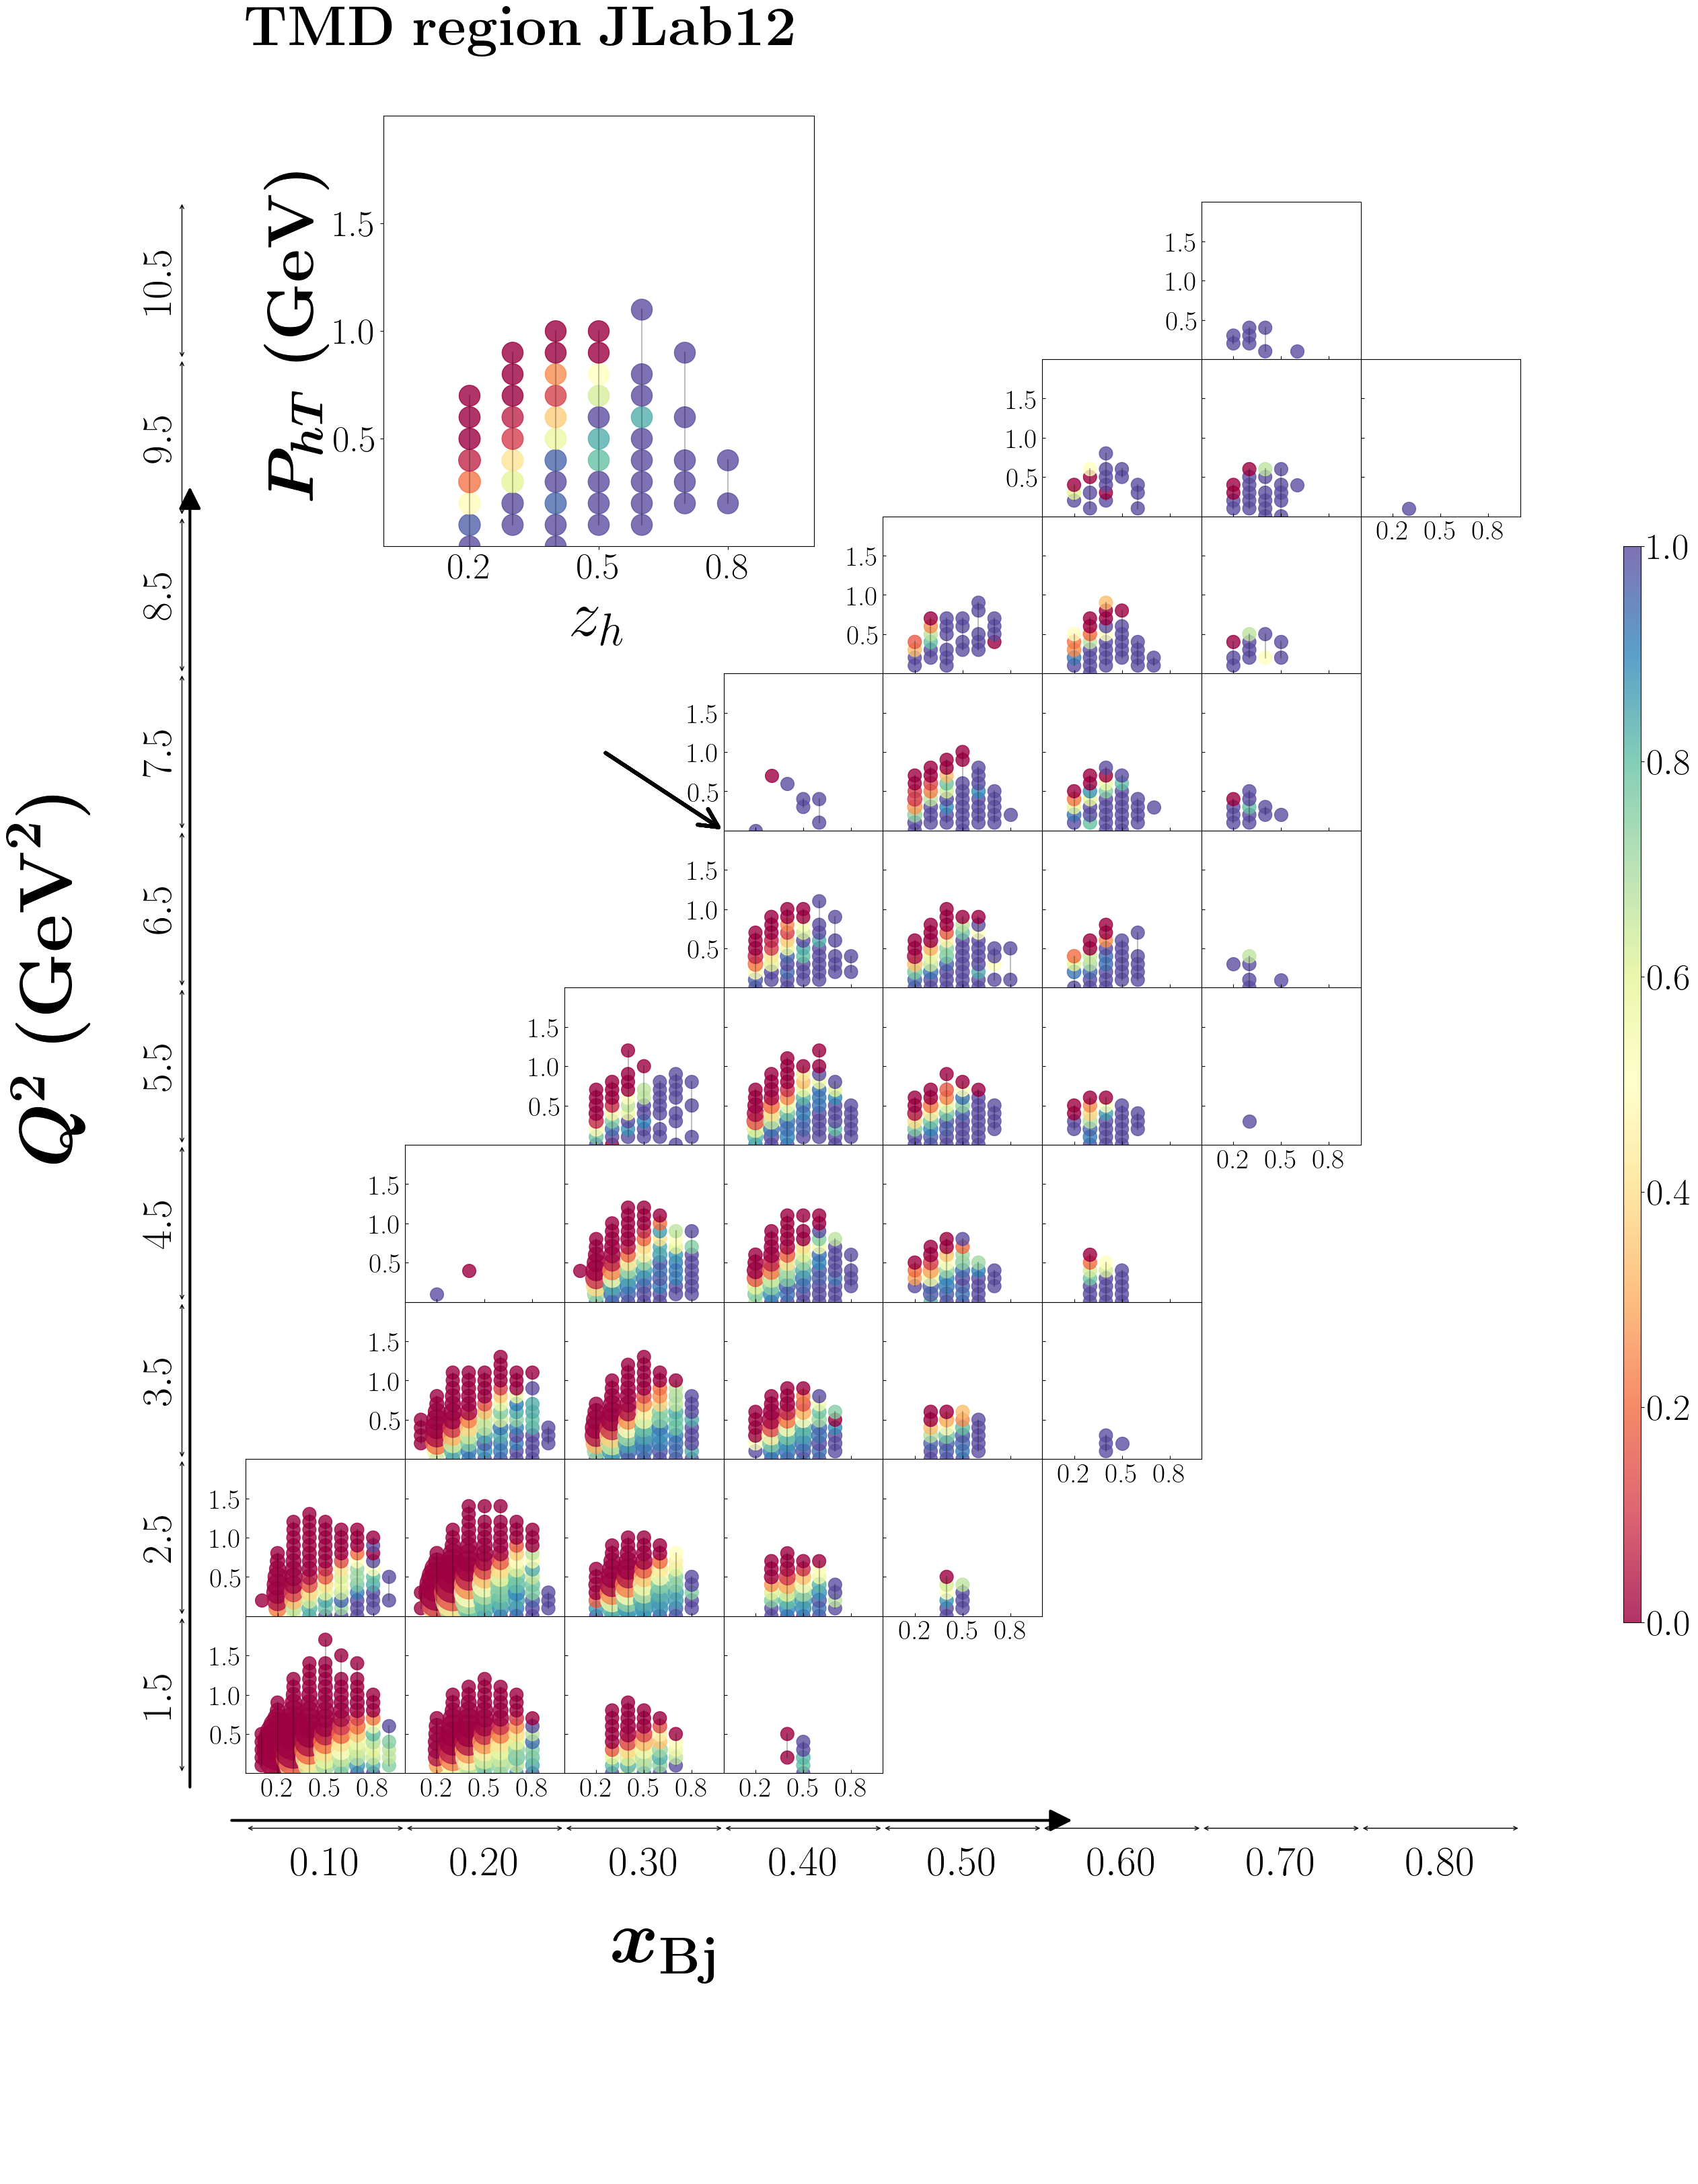

In [155]:
plotJLab12_bin_count(data ,hadron = 'pi+', affinity = 'tmdaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

/var/folders/yt/tjm27b5n1dzb1mgwxkts1hq80000gn/T/ipykernel_10745/1705390436.py:195: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\


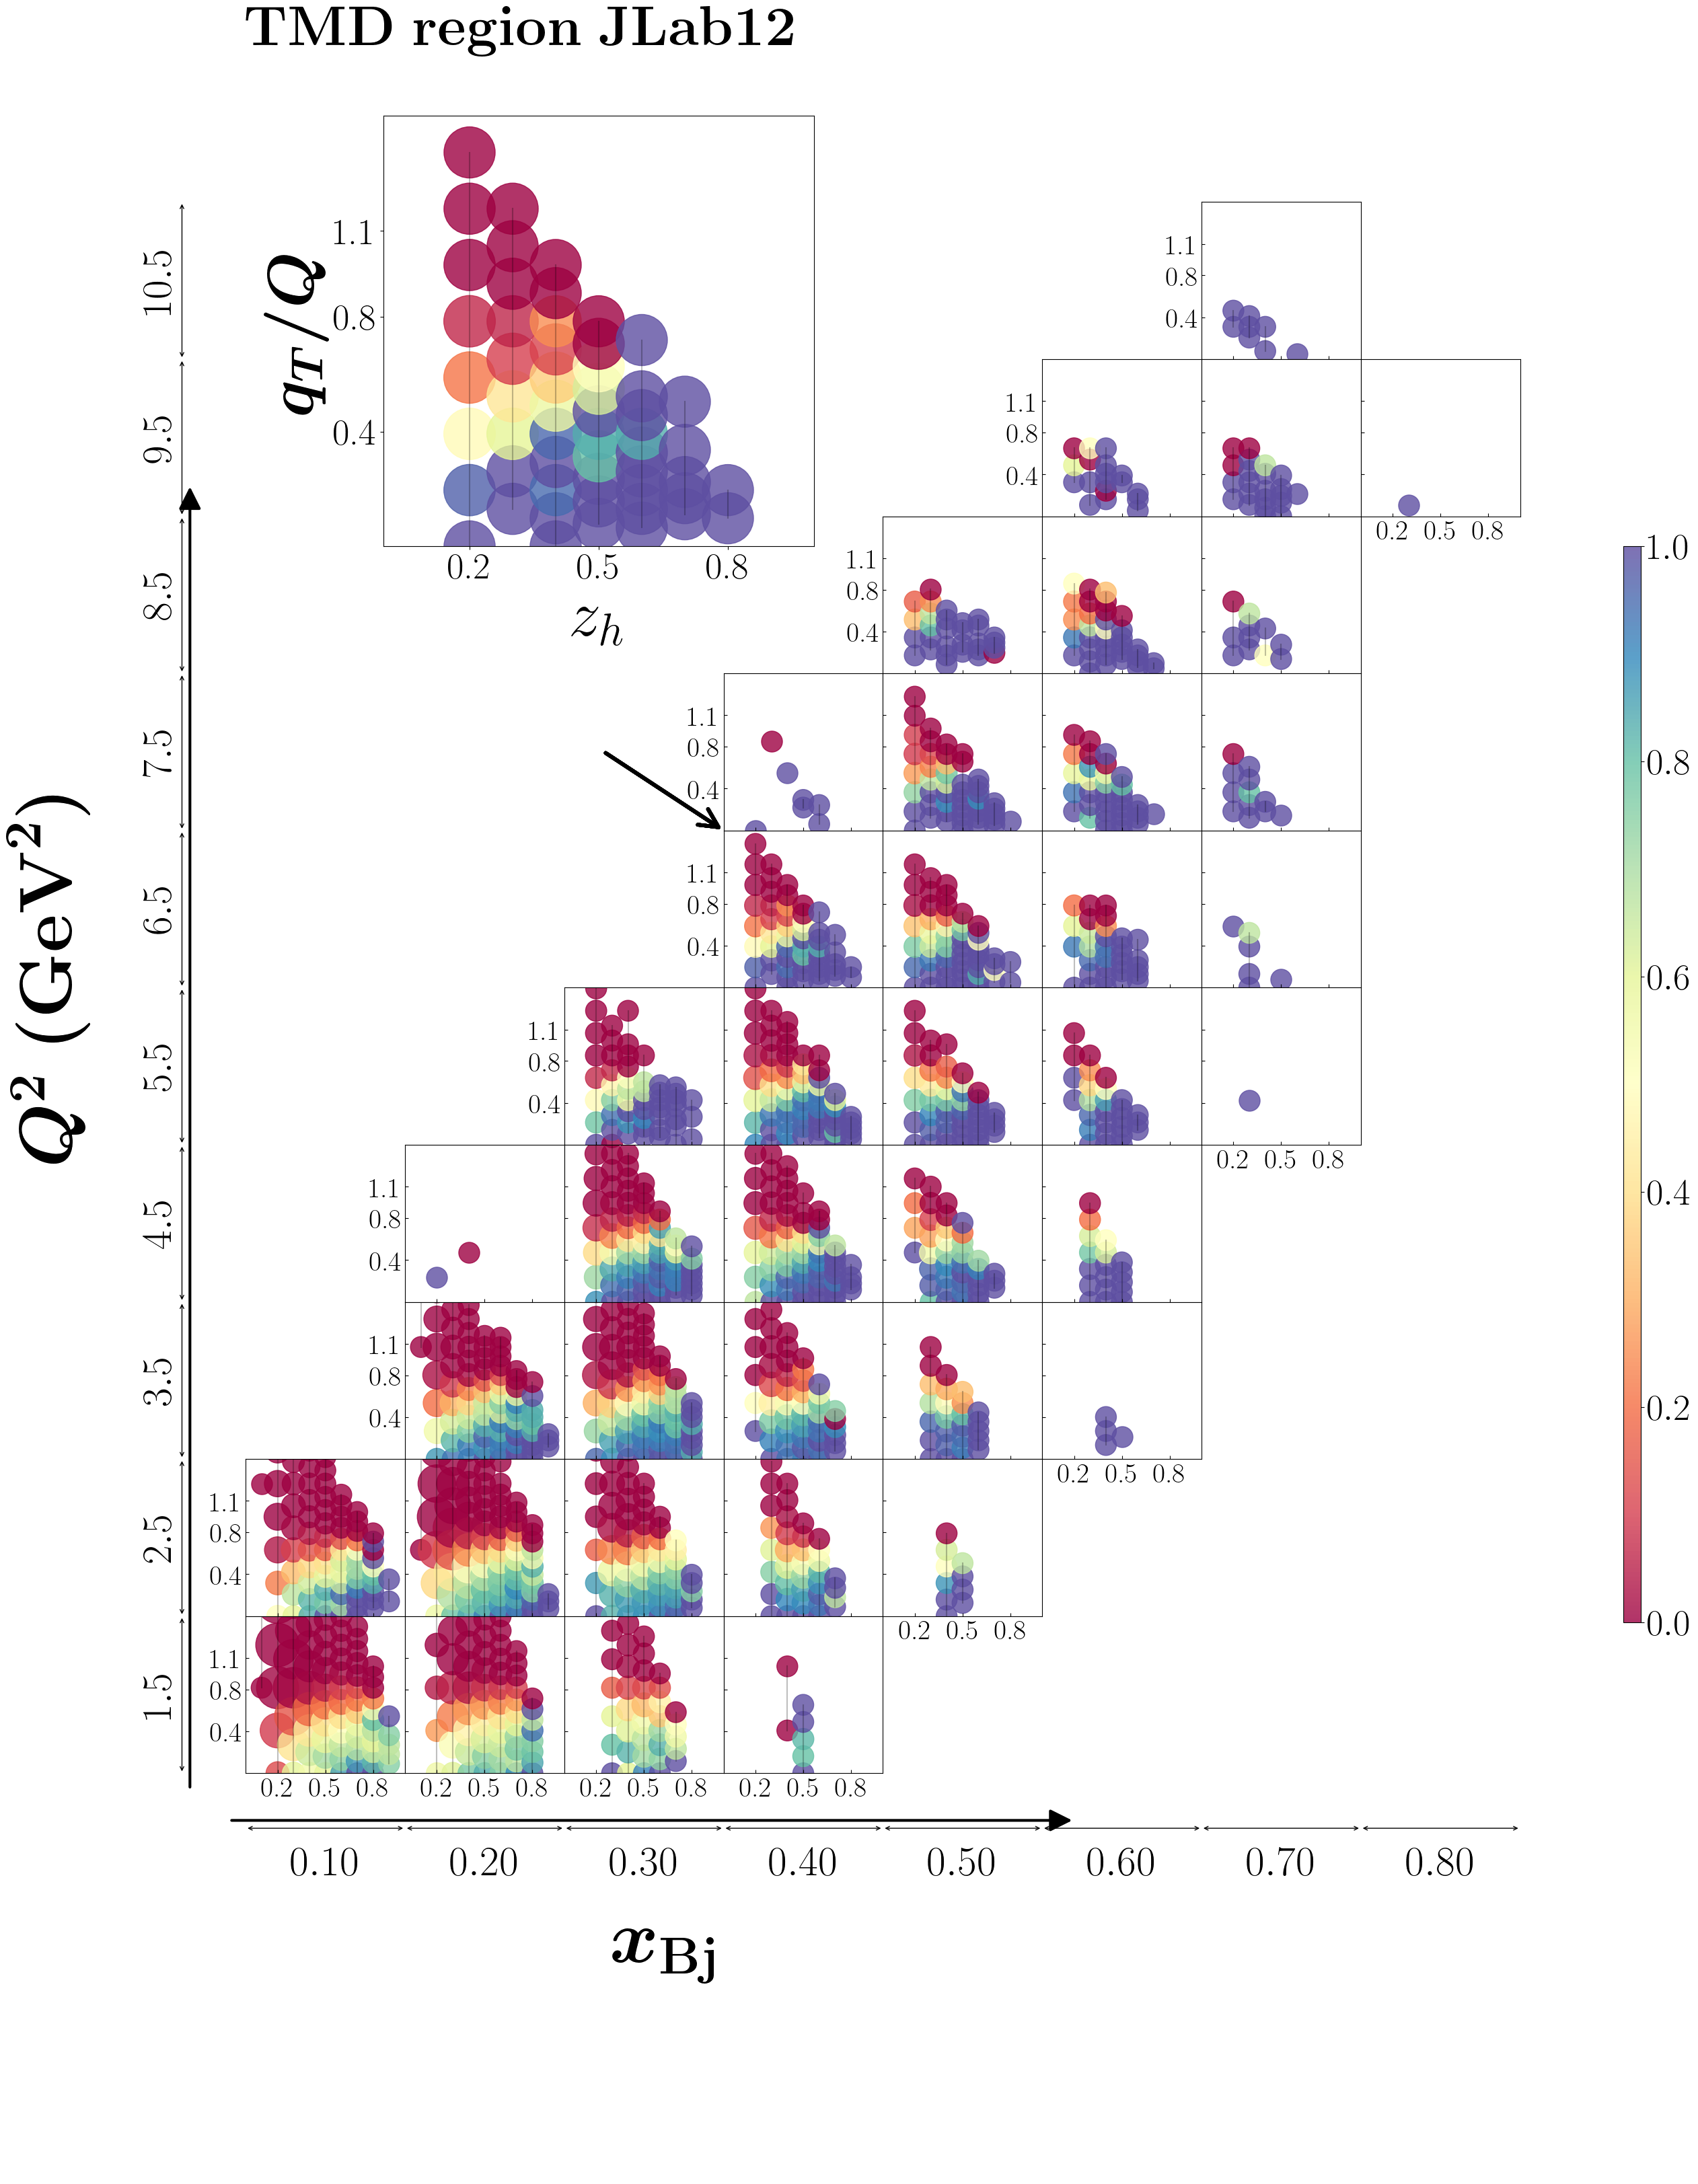

In [153]:
plotJLab12_bin_count(data ,hadron = 'pi+', affinity = 'tmdaff', plotx = 'qToverQ', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

In [130]:
data_R = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/jlab12_MC_data_x_sorted.xlsx')
data_100k = data_sorted
data_sorted['qT'] = data_sorted['pT']/data_sorted['z']

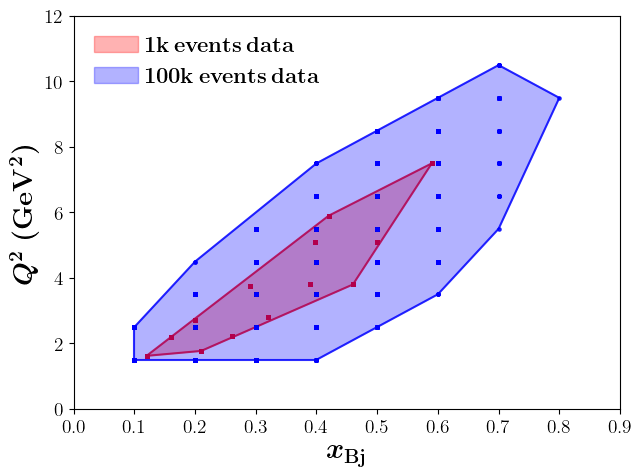

In [125]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    data = data_R


    vert_lab = "Q2" 
    hor_lab = "x"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


#     colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm 1k\, events \, data$}',zorder=5)

    
    # Updated 100k events
    data = data_100k


    vert = data[vert_lab].values
    hor = data[hor_lab].values

#     colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm 100k\, events \, data$}',zorder=10)
    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 12])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 0.9])

    plt.savefig("./Figs/experiments_kinematics_comparison.pdf", bbox_inches='tight')
    plt.show()

plotkin()    

In [118]:
Harut = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/Old_data/jlab12affinity_1400_events0.3.xlsx')

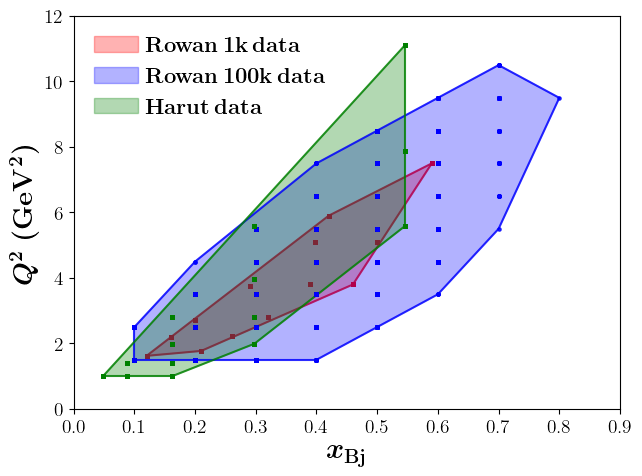

In [126]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    data = data_R


    vert_lab = "Q2" 
    hor_lab = "x"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


#     colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm Rowan \, 1k \, data$}',zorder=5)


    # 100k events Rowan
    data = data_100k


    vert = data[vert_lab].values
    hor = data[hor_lab].values

    colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm Rowan \, 100k \, data$}',zorder=10)
    
    
    # Harut
    data = Harut


    vert = data[vert_lab].values
    hor = data[hor_lab].values

#     colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="g", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'g', edgecolor='g', alpha=0.3, label=r'\boldmath{$\rm Harut \, data$}',zorder=10)
    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 12])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 0.9])

    plt.savefig("./Figs/experiments_kinematics.pdf", bbox_inches='tight')
    plt.show()

plotkin()    

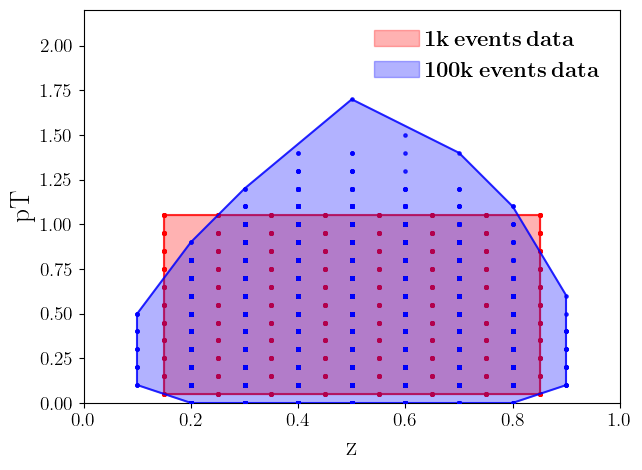

In [128]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    data = data_R


    vert_lab = "pT" 
    hor_lab = "z"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


#     colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm 1k\, events \, data$}',zorder=5)

    
    # Updated 100k events
    data = data_100k


    vert = data[vert_lab].values
    hor = data[hor_lab].values

#     colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm 100k\, events \, data$}',zorder=10)
    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 2.2])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 1])

    plt.savefig("./Figs/experiments_kinematics_pT_z.pdf", bbox_inches='tight')
    plt.show()

plotkin()    

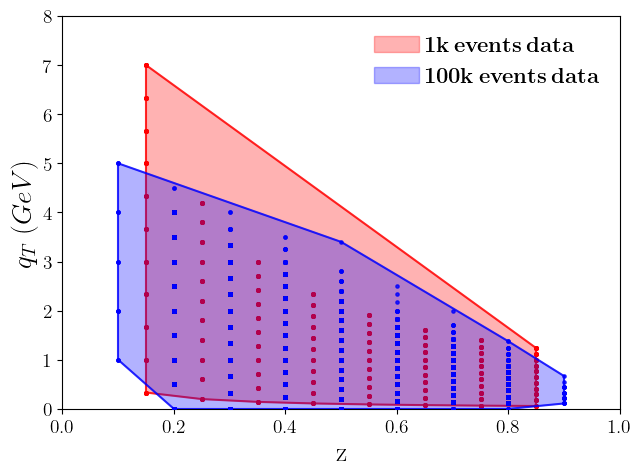

In [133]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def plotkin():
    data = data_R


    vert_lab = "qT" 
    hor_lab = "z"
    alpha=0.8

    # Rowan
    vert = data[vert_lab].values
    hor = data[hor_lab].values


#     colors = data["tmdaff"]


    fig, ax = plt.subplots()
    ax.tick_params(axis='both', which='minor', labelsize=30, direction='in')
    #ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    #ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
    #ax.tick_params(axis=‘both’, which=‘both’, labelsize=20, direction=‘in’, length=6)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



    ax.set_ylabel(custom_label(vert_lab),
                            size=20)
    ax.set_xlabel(custom_label(hor_lab),
                            size=20)

    

    plot = ax.scatter(hor, vert, c="r", alpha=0.8, s=5.5, zorder=7)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'r-', alpha=alpha,zorder=6) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'r',edgecolor='r', alpha=0.3, label=r'\boldmath{$\rm 1k\, events \, data$}',zorder=5)

    
    # Updated 100k events
    data = data_100k


    vert = data[vert_lab].values
    hor = data[hor_lab].values

#     colors = data["tmdaff"]


    plot = ax.scatter(hor, vert, c="b", alpha=0.8, s=5.5, zorder=12)

    points = np.ndarray(shape=(len(vert),2), dtype=float)
    for i in range(len(vert)):
            points[i,0] = hor[i]
            points[i,1] = vert[i]

    hull = ConvexHull(points)

    for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=alpha,zorder=11) 
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'b', edgecolor='b', alpha=0.3, label=r'\boldmath{$\rm 100k\, events \, data$}',zorder=10)
    
    
    
    fig.tight_layout()

    ax.legend(prop={"size":16},frameon=0,handletextpad=0.3)

#     ax.set_yscale("log")
    ax.set_ylim([0.0, 8])
#     ax.set_xscale("log")
    ax.set_xlim([0.0, 1])

    plt.savefig("./Figs/experiments_kinematics_qT_z.pdf", bbox_inches='tight')
    plt.show()

plotkin()    